In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
from astropy import cosmology
from astropy.io import fits
from astropy import table
import SAGA

In [3]:
plt.rcParams['font.size'] = 16

In [4]:
cosmo = cosmology.FlatLambdaCDM(70.,0.3)

In [15]:
gama = fits.getdata('../../gama/local_data/StellarMassesLambdarv24.fits',1)
gama_phot = fits.getdata('../../gama/local_data/SersicCatSDSSv09.fits',1)

gama = table.Table(gama).to_pandas ()
gama = gama.set_index('CATAID')

gama_phot = table.Table(gama_phot).to_pandas ()
gama_phot = gama_phot.set_index('CATAID')

gama['GALMUE_r'] = gama_phot['GALMUE_r']
gama['GALMUEAVG_r'] = gama_phot['GALMUEAVG_r']
gama['gminusr'] = gama_phot['GALMAG_g'] - gama_phot['GALMAG_r']
gama['GALMAG_r'] = gama_phot['GALMAG_r']
gama = gama.loc[(gama['gminusr']>-2)&(gama['gminusr']<3.)].copy()

In [16]:
gama_rlim = 19.8
saga_rlim = 20.75
saga_grlim = lambda r: 0.9 - 0.06*(r-14.) # must be bluer than <
saga_sblim = lambda r: 18.5 + 0.7*(r-14.) # must be fainter than >

In [17]:
c_gama_sl = gama['gminusr'] <= saga_grlim(gama['GALMAG_r'])
c_gama_sl &= gama['GALMUEAVG_r'] >= saga_sblim(gama['GALMAG_r'])
c_gama_sl &= gama['GALMAG_r'] <= gama_rlim # apply GAMA's own maglim
gama_sl = gama.loc[c_gama_sl].copy()

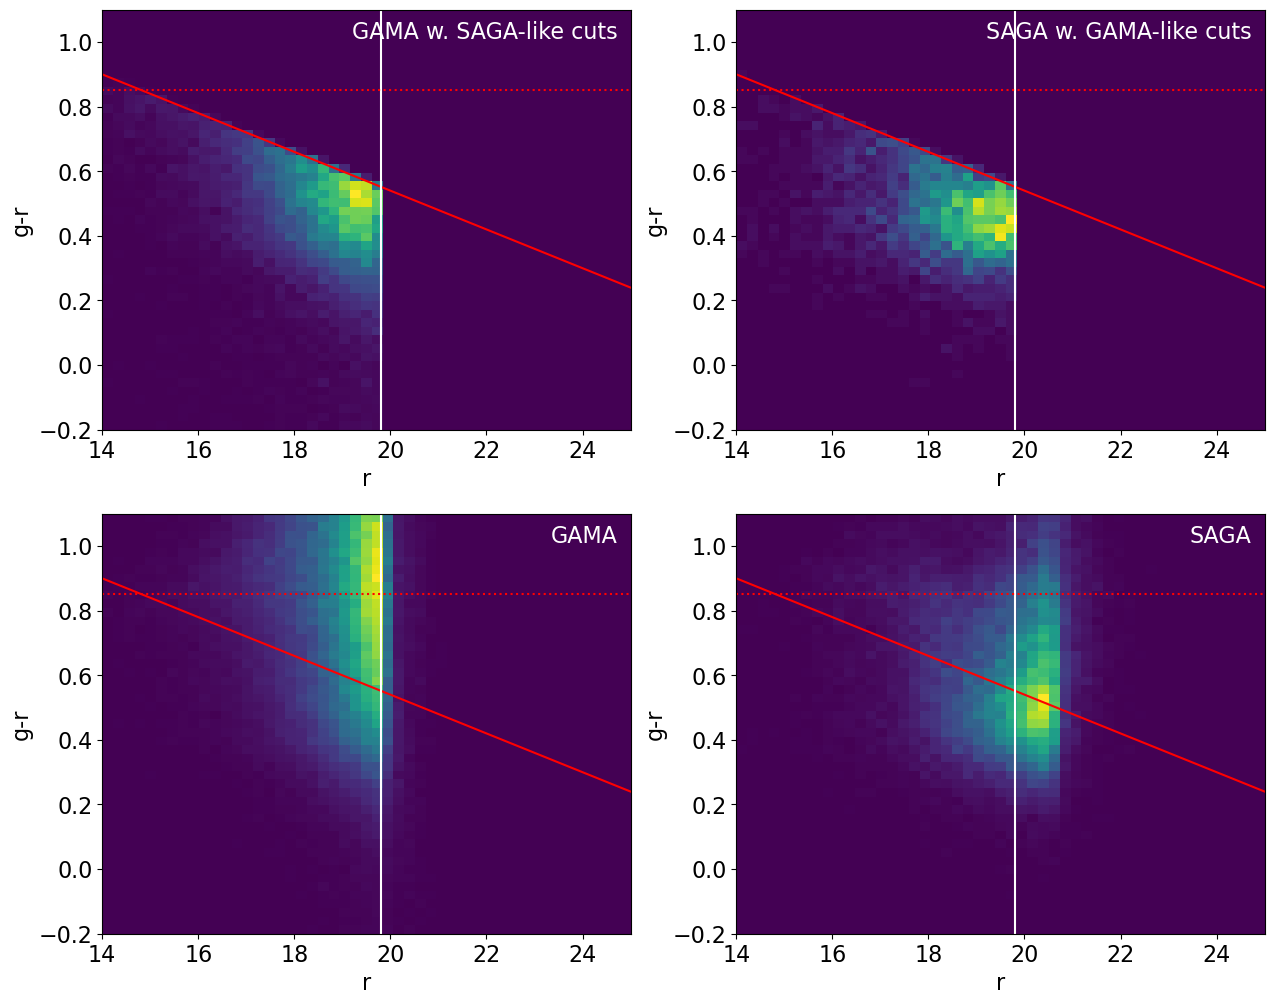

In [211]:
fig, axarr = plt.subplots(2,2,figsize=(15,12))
bins_l = [np.linspace(14.,25.,50), np.linspace(-0.2,1.1,50)]
axarr[0,0].hist2d ( gama_sl['GALMAG_r'], gama_sl['gminusr'], bins=bins_l)
axarr[0,1].hist2d ( saga_gl['r_mag'], saga_gl['gr'], bins=bins_l)
axarr[1,0].hist2d ( gama['GALMAG_r'], gama['gminusr'], bins=bins_l)
axarr[1,1].hist2d ( lowz['r_mag'], lowz['gr'], bins=bins_l)

text = ['GAMA w. SAGA-like cuts', 'SAGA w. GAMA-like cuts', 'GAMA','SAGA']
for idx,ax in enumerate(axarr.flatten()):
    ax.plot ( bins_l[0], saga_grlim(bins_l[0]), color='r' )
    ax.text ( 0.975, 0.975, text[idx], ha='right', va='top', color='w', transform=ax.transAxes )
    ax.axvline(gama_rlim, color='w')
    ax.axhline(0.85, color='r', ls=':')
    ax.set_xlabel('r')
    ax.set_ylabel('g-r')

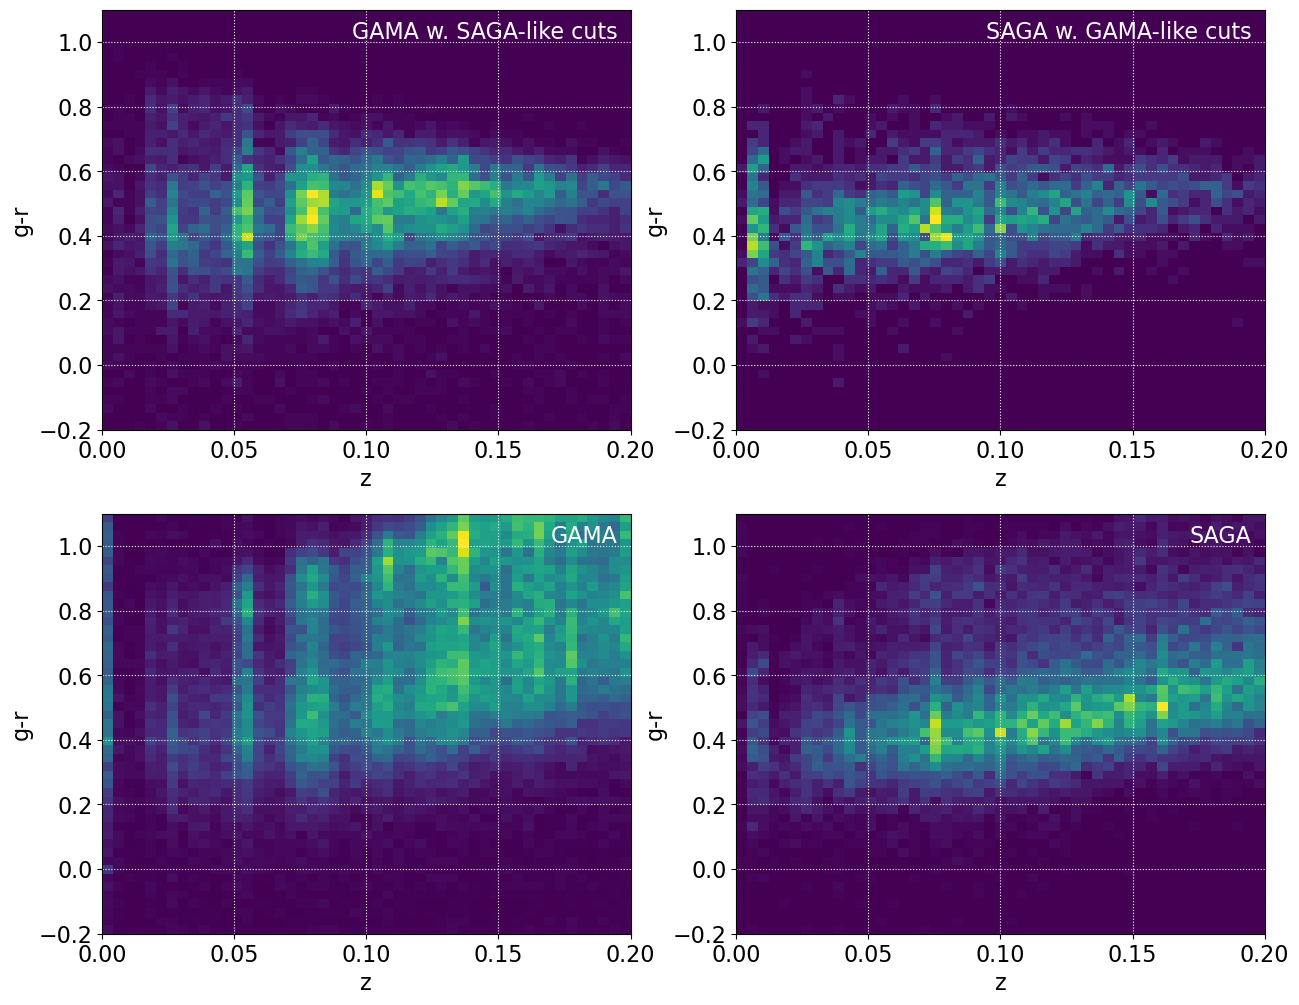

In [197]:
fig, axarr = plt.subplots(2,2,figsize=(15,12))
bins_l = [np.linspace(0., 0.2,50), np.linspace(-0.2,1.1,50)]
axarr[0,0].hist2d ( gama_sl['Z'], gama_sl['gminusr'], bins=bins_l)
axarr[0,1].hist2d ( saga_gl['SPEC_Z'], saga_gl['gr'], bins=bins_l)
axarr[1,0].hist2d ( gama['Z'], gama['gminusr'], bins=bins_l)
axarr[1,1].hist2d ( lowz['SPEC_Z'], lowz['gr'], bins=bins_l)



text = ['GAMA w. SAGA-like cuts', 'SAGA w. GAMA-like cuts', 'GAMA','SAGA']
for idx,ax in enumerate(axarr.flatten()):
    ax.plot ( bins_l[0], saga_grlim(bins_l[0]), color='r' )
    ax.text ( 0.975, 0.975, text[idx], ha='right', va='top', color='w', transform=ax.transAxes )
    ax.set_xlabel('z')
    ax.set_ylabel('g-r')
    ax.grid(color='w',ls=':')

In [172]:
midpts = lambda x: 0.5*(x[1:]+x[:-1])

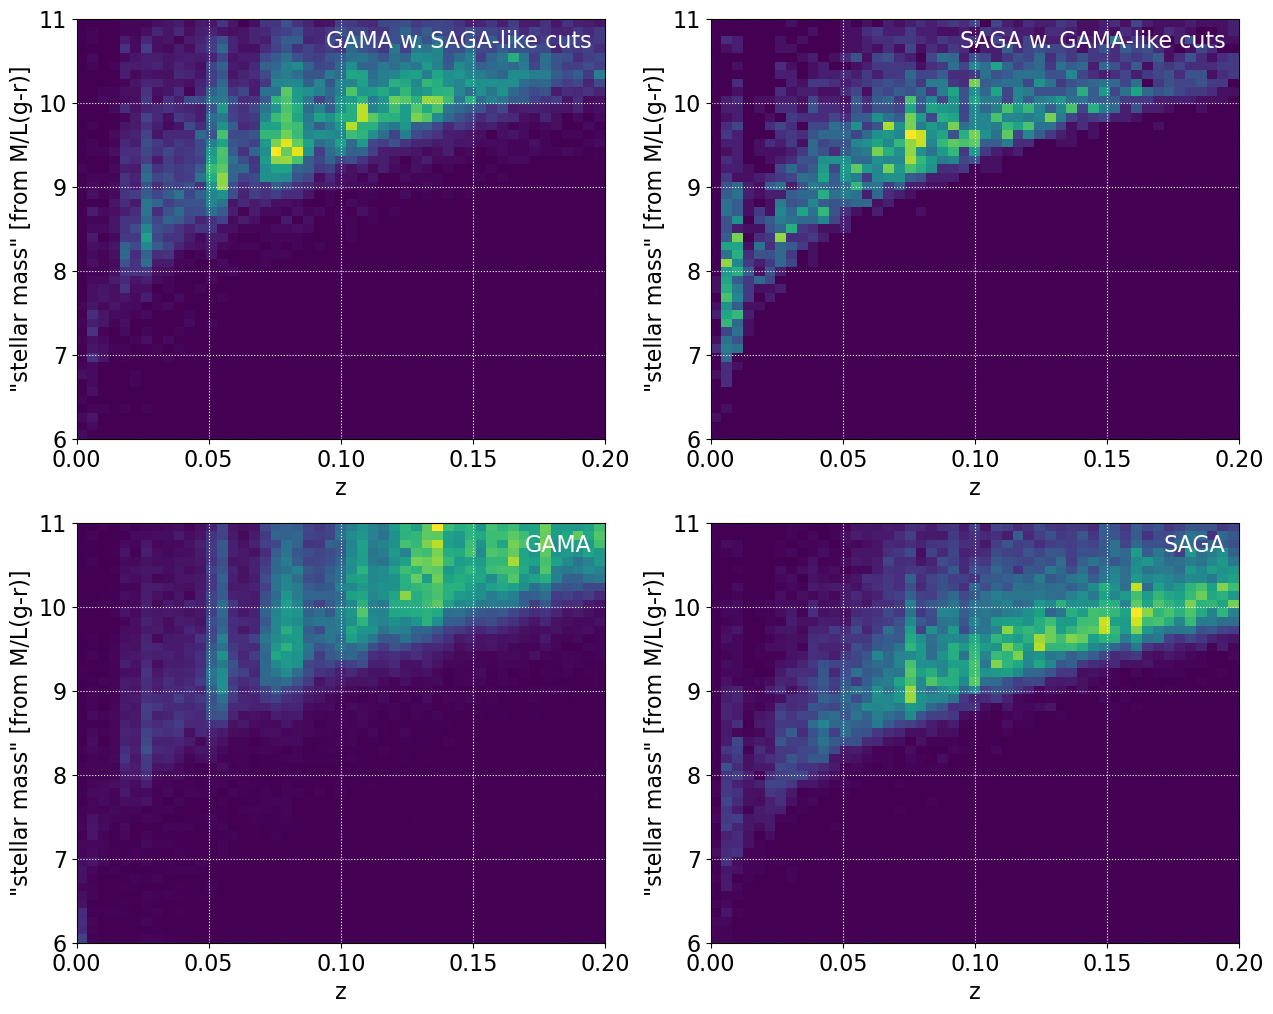

In [173]:
fig, axarr = plt.subplots(2,2,figsize=(15,6*2))
bins_l = [np.linspace(0., 0.2,50), np.linspace(6.,11.,50)]
out = axarr[0,0].hist2d ( gama_sl['Z'], gama_sl['cm_mass'], bins=bins_l)
axarr[1,0].hist2d( gama['Z'], gama['cm_mass'], bins=bins_l )
axarr[0,1].hist2d ( saga_gl['SPEC_Z'], saga_gl['cm_mass'], bins=bins_l)
axarr[1,1].hist2d( lowz['SPEC_Z'], lowz['cm_mass'], bins=bins_l )
#axarr[1].contour (  midpts(out[1]), midpts(out[2]), out[0].T, colors='r')

text = ['GAMA w. SAGA-like cuts', 'SAGA w. GAMA-like cuts', 'GAMA','SAGA']
for idx,ax in enumerate(axarr.flatten()):
    ax.plot ( bins_l[0], saga_grlim(bins_l[0]), color='r' )
    ax.text ( 0.975, 0.975, text[idx], ha='right', va='top', color='w', transform=ax.transAxes )
    #ax.axvline(gama_rlim, color='w')
    ax.set_xlabel('z')
    ax.set_ylabel('"stellar mass" [from M/L(g-r)]')
    ax.grid(color='w',ls=':')

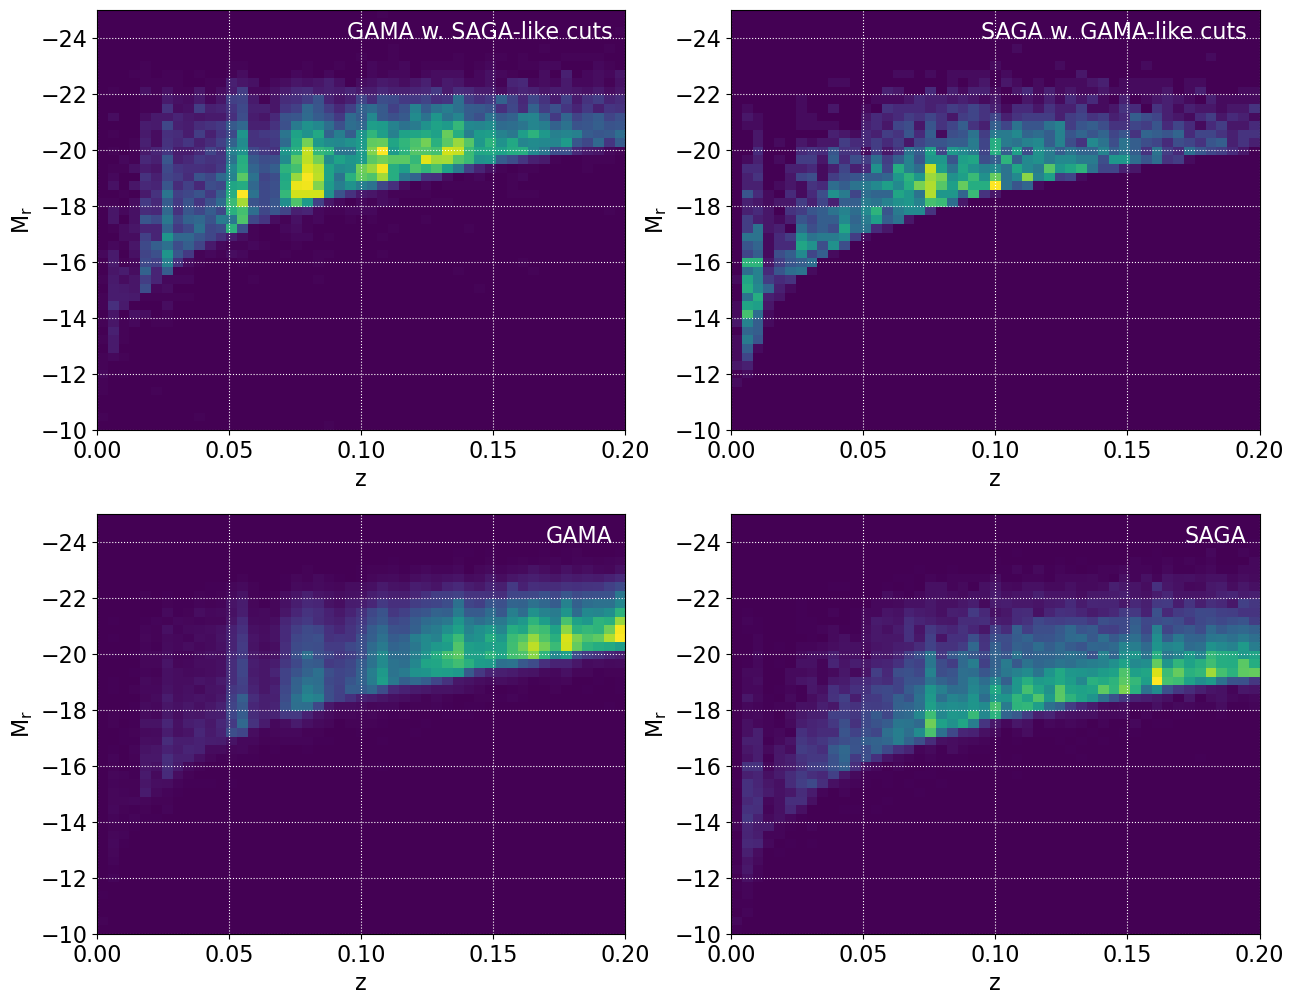

In [174]:
fig, axarr = plt.subplots(2,2,figsize=(15,6*2))
bins_l = [np.linspace(0., 0.2,50), np.linspace(-25,-10,50)]

out = axarr[0,0].hist2d ( gama_sl['Z'], gama_sl['absmag_r'], bins=bins_l)
axarr[1,0].hist2d( gama['Z'], gama['absmag_r'], bins=bins_l )
axarr[0,1].hist2d ( saga_gl['SPEC_Z'], saga_gl['Mr'], bins=bins_l)
axarr[1,1].hist2d( lowz['SPEC_Z'], lowz['Mr'], bins=bins_l )


text = ['GAMA w. SAGA-like cuts', 'SAGA w. GAMA-like cuts', 'GAMA','SAGA']
for idx,ax in enumerate(axarr.flatten()):
    ax.plot ( bins_l[0], saga_grlim(bins_l[0]), color='r' )
    ax.text ( 0.975, 0.975, text[idx], ha='right', va='top', color='w', transform=ax.transAxes )

    ax.set_xlabel('z')
    ax.set_ylabel(r'M$_{\rm r}$')
    ax.grid(color='w',ls=':')
    ax.set_ylim(ax.get_ylim()[::-1])

## Compare to full SAGA
TODO : what is the spectroscopic commitment of SAGA exploration mode? 50%?

In [175]:
c_saga_pt = lowz['gr'] <= saga_grlim(lowz['r_mag']) # apply SAGA's own colorcut
c_saga_pt &= lowz['sb_r'] >= saga_sblim(lowz['r_mag'])
saga_pt = lowz.loc[c_saga_pt].copy() # SAGA primary
saga_out = lowz.loc[~c_saga_pt].copy() # SAGA exploration
saga_out = saga_out.loc[saga_out['r_mag'] <= saga_rlim]

/var/folders/py/1g64k0fx3rd03lcwckrdjbt80000gn/T/ipykernel_4843/3721949583.py:11: RuntimeWarning: invalid value encountered in divide
  recfrac = inhist[0]*resource_factor/(inhist[0]*resource_factor+outhist[0])


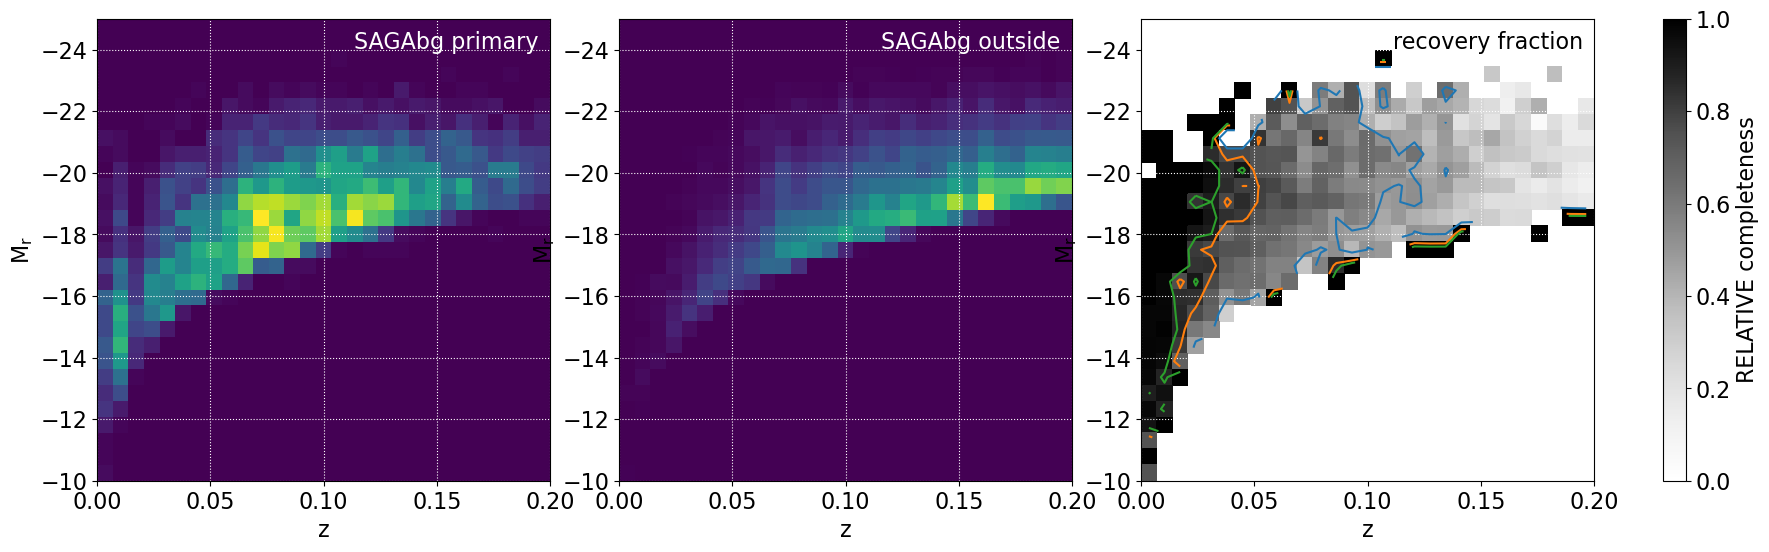

In [222]:
fig, axarr = plt.subplots(1,4,figsize=(5*4.1,6), gridspec_kw={'width_ratios':[1.,1.,1.,.05]})
nbins = 30
bins_l = [np.linspace(0., 0.2,nbins), np.linspace(-25,-10,nbins)]

inhist = axarr[0].hist2d ( saga_pt['SPEC_Z'], saga_pt['Mr'], bins=bins_l)
outhist = axarr[1].hist2d ( saga_out['SPEC_Z'], saga_out['Mr'], bins=bins_l)

resource_factor = outhist[0].sum() / inhist[0].sum()
#saga_out.shape[0] / saga_pt.shape[0] # a very clumsy accounting for the
# fact that more spectra were taken in exploration mode
recfrac = inhist[0]*resource_factor/(inhist[0]*resource_factor+outhist[0])
im = axarr[2].pcolor ( inhist[1], inhist[2], recfrac.T, cmap='Greys' )
axarr[2].contour ( midpts(inhist[1]), midpts(inhist[2]), recfrac.T, colors=['C0','C1','C2'], levels=[0.5,0.8,0.9])
plt.colorbar(im, cax=axarr[-1], label='RELATIVE completeness')

text = ['SAGAbg primary', 'SAGAbg outside', 'recovery fraction']
cc_l = ['w','w','k']
for idx,ax in enumerate(axarr.flatten()[:-1]):
    ax.text ( 0.975, 0.975, text[idx], ha='right', va='top', color=cc_l[idx], transform=ax.transAxes )

    ax.set_xlabel('z')
    ax.set_ylabel(r'M$_{\rm r}$')
    ax.grid(color='w',ls=':')
    ax.set_ylim(ax.get_ylim()[::-1])

/var/folders/py/1g64k0fx3rd03lcwckrdjbt80000gn/T/ipykernel_4843/559856798.py:11: RuntimeWarning: invalid value encountered in divide
  recfrac = inhist[0]*resource_factor/(inhist[0]*resource_factor+outhist[0])


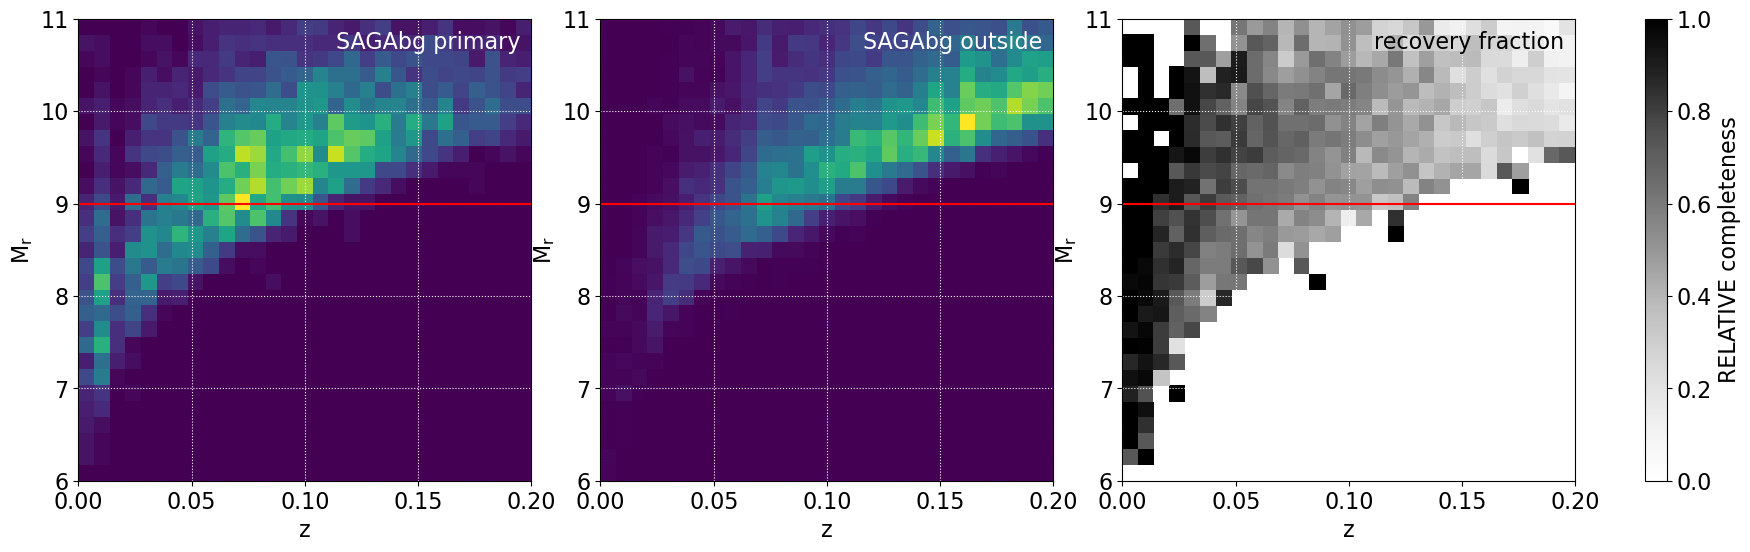

In [247]:
fig, axarr = plt.subplots(1,4,figsize=(5*4.1,6), gridspec_kw={'width_ratios':[1.,1.,1.,.05]})
nbins = 30
bins_l = [np.linspace(0., 0.2,nbins), np.linspace(6.,11.,nbins)]

inhist = axarr[0].hist2d ( saga_pt['SPEC_Z'], saga_pt['cm_mass'], bins=bins_l)
outhist = axarr[1].hist2d ( saga_out['SPEC_Z'], saga_out['cm_mass'], bins=bins_l)

resource_factor = outhist[0].sum() / inhist[0].sum()
#saga_out.shape[0] / saga_pt.shape[0] # a very clumsy accounting for the
# fact that more spectra were taken in exploration mode
recfrac = inhist[0]*resource_factor/(inhist[0]*resource_factor+outhist[0])
im = axarr[2].pcolor ( inhist[1], inhist[2], recfrac.T, cmap='Greys' )
#axarr[2].contour ( midpts(inhist[1]), midpts(inhist[2]), recfrac.T, colors=['C0','C1','C2'], levels=[0.5,0.8,0.9])
plt.colorbar(im, cax=axarr[-1], label='RELATIVE completeness')

text = ['SAGAbg primary', 'SAGAbg outside', 'recovery fraction']
cc_l = ['w','w','k']
for idx,ax in enumerate(axarr.flatten()[:-1]):
    ax.text ( 0.975, 0.975, text[idx], ha='right', va='top', color=cc_l[idx], transform=ax.transAxes )

    ax.set_xlabel('z')
    ax.set_ylabel(r'M$_{\rm r}$')
    ax.grid(color='w',ls=':')
    ax.axhline(9.,color='r')

In [91]:
# how probable is it to draw a negative number if 
# samples are unbalanced
Ux = np.random.uniform(0.,10.,100000)
ax = np.random.normal(5.,1.,1000)

In [116]:
pinside = lambda x,m=5.,s=1.: (2.*np.pi*s**2)**(-0.5) * np.exp(-(x-m)**2/(2.*s**2))
puniform = lambda x, xmin=0., xmax=10.: np.ones_like(x) / (xmax-xmin)

In [93]:
bins = np.arange(0.,10.,.25)

In [94]:
counts_ax = np.zeros_like(bins)
assns_ax, _counts_ax = np.unique(np.digitize(ax, bins), return_counts=True)
counts_ax[assns_ax] = _counts_ax
assns_ux, counts_ux = np.unique(np.digitize(Ux, bins), return_counts=True)

In [106]:
(Ux<5.).sum()

49787

In [109]:
.5*ax.size / (.5 * Ux.size) * Ux.size/ax.size

1.0

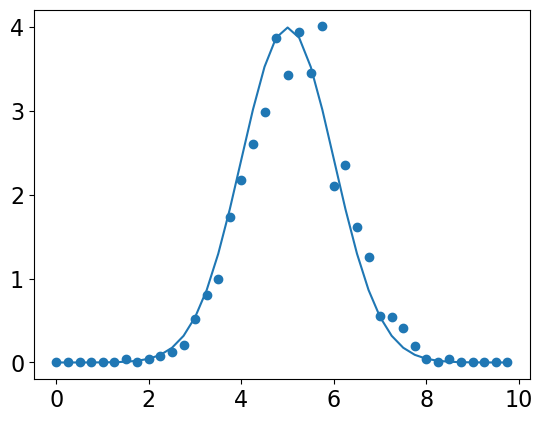

In [120]:
plt.plot(bins, pinside(bins)/puniform(bins))
#plt.plot(bins, puniform(bins))
plt.scatter(bins, counts_ax/counts_ux * Ux.size/ax.size)


In [144]:
#pinside = lambda x,m=5.,s=1.: (2.*np.pi*s**2)**(-0.5) * np.exp(-(x-m)**2/(2.*s**2))
p1 = lambda x: pinside(x, 5.,1.)
p2 = lambda x: pinside(x, 6.,2.)
s1 = np.random.normal(5.,1.,10000)
s2 = np.random.normal(6.,2.,12000)
bins = np.arange(0.,15.,.25)
counts_s1 = np.zeros_like(bins)
assns_s1, _counts_s1 = np.unique(np.digitize(s1, bins), return_counts=True)
counts_s1[assns_s1] = _counts_s1

counts_s2 = np.zeros_like(bins)
assns_s2, _counts_s2 = np.unique(np.digitize(s2, bins), return_counts=True)
counts_s2[assns_s2] = _counts_s2

/var/folders/py/1g64k0fx3rd03lcwckrdjbt80000gn/T/ipykernel_2013/2390003158.py:2: RuntimeWarning: invalid value encountered in divide
  plt.scatter(bins, counts_s1/counts_s2 * counts_s2.sum()/counts_s1.sum() )


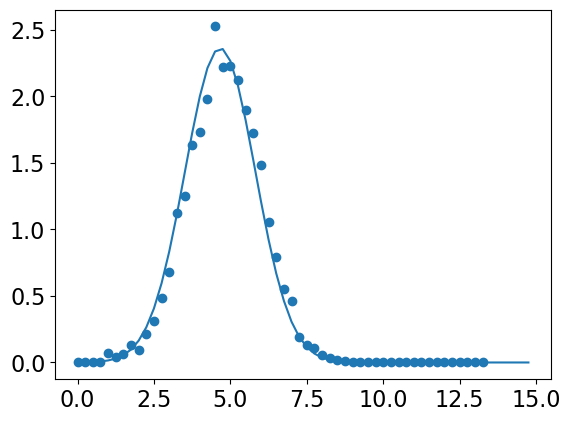

In [147]:
plt.plot(bins,p1(bins)/p2(bins))
plt.scatter(bins, counts_s1/counts_s2 * counts_s2.sum()/counts_s1.sum() )

In [9]:
gama.query('(Z<0.15)&(logmstar<9.6)').shape

(23578, 121)

In [10]:
gr = (gama.PETROMAG_G - gama.PETROMAG_R).reindex(intersection)
sb_r = (gama.PETROMAG_R + 2.5*np.log10(2.*np.pi*gama.PETRORAD_R**2)).reindex(intersection)
rmag = gama.reindex(intersection).PETROMAG_R

in_primary = sb_r - 0.7*(rmag - 14.) > 18.5
in_primary &= gr + 0.06*(rmag - 14.) < 0.9

NameError: name 'gamaspec' is not defined

# GAMA internal comparison

In [214]:
#c_gama_sl = gama['gminusr'] <= saga_grlim(gama['GALMAG_r'])
#c_gama_sl &= gama['GALMUE_r'] >= saga_sblim(gama['GALMAG_r'])
#c_gama_sl &= gama['GALMAG_r'] <= gama_rlim # apply GAMA's own maglim
#gama_sl = gama.loc[c_gama_sl].copy() # GAMA, SAGA-like

In [296]:
#gama_out = gama.loc[gama['GALMAG_r']<=gama_rlim]
# lowz.loc[~c_saga_pt].copy()
gama_out = gama.loc[~c_gama_sl]
gama_out = gama_out.loc[gama_out['GALMAG_r']<=gama_rlim].copy()

/var/folders/py/1g64k0fx3rd03lcwckrdjbt80000gn/T/ipykernel_4843/2809995650.py:9: RuntimeWarning: invalid value encountered in divide
  recfrac = inhist[0]/(outhist[0]+inhist[0])


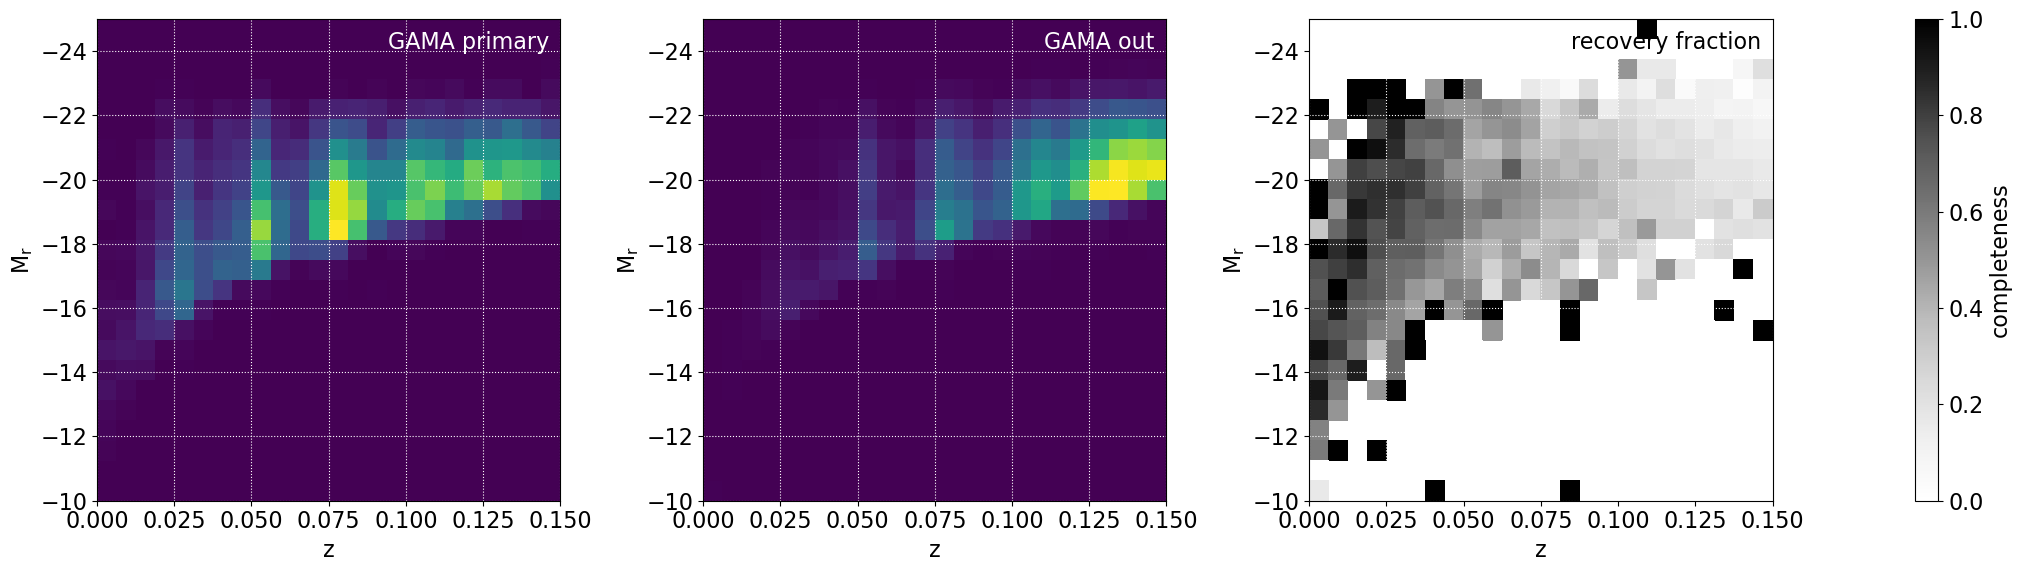

In [237]:
fig, axarr = plt.subplots(1,4,figsize=(5*4.1,6), gridspec_kw={'width_ratios':[1.,1.,1.,.05]})
nbins = 25
bins_l = [np.linspace(0., 0.15,nbins), np.linspace(-25,-10,nbins)]

inhist = axarr[0].hist2d ( gama_sl['Z'], gama_sl['absmag_r'], bins=bins_l)
outhist = axarr[1].hist2d ( gama_out['Z'], gama_out['absmag_r'], bins=bins_l)

# fact that more spectra were taken in exploration mode
recfrac = inhist[0]/(outhist[0]+inhist[0])
im = axarr[2].pcolor ( inhist[1], inhist[2], recfrac.T, cmap='Greys' )
#axarr[2].contour ( midpts(inhist[1]), midpts(inhist[2]), recfrac.T, colors=['C0','C1','C2'], levels=[0.5,0.8,0.9])
plt.colorbar(im, cax=axarr[-1], label='completeness')

text = ['GAMA primary', 'GAMA out', 'recovery fraction']
cc_l = ['w','w','k']
for idx,ax in enumerate(axarr.flatten()[:-1]):
    ax.text ( 0.975, 0.975, text[idx], ha='right', va='top', color=cc_l[idx], transform=ax.transAxes )

    ax.set_xlabel('z')
    ax.set_ylabel(r'M$_{\rm r}$')
    ax.grid(color='w',ls=':')
    ax.set_ylim(ax.get_ylim()[::-1])
plt.tight_layout ()

/var/folders/py/1g64k0fx3rd03lcwckrdjbt80000gn/T/ipykernel_4843/3965764592.py:9: RuntimeWarning: invalid value encountered in divide
  recfrac = inhist[0]/(outhist[0]+inhist[0])


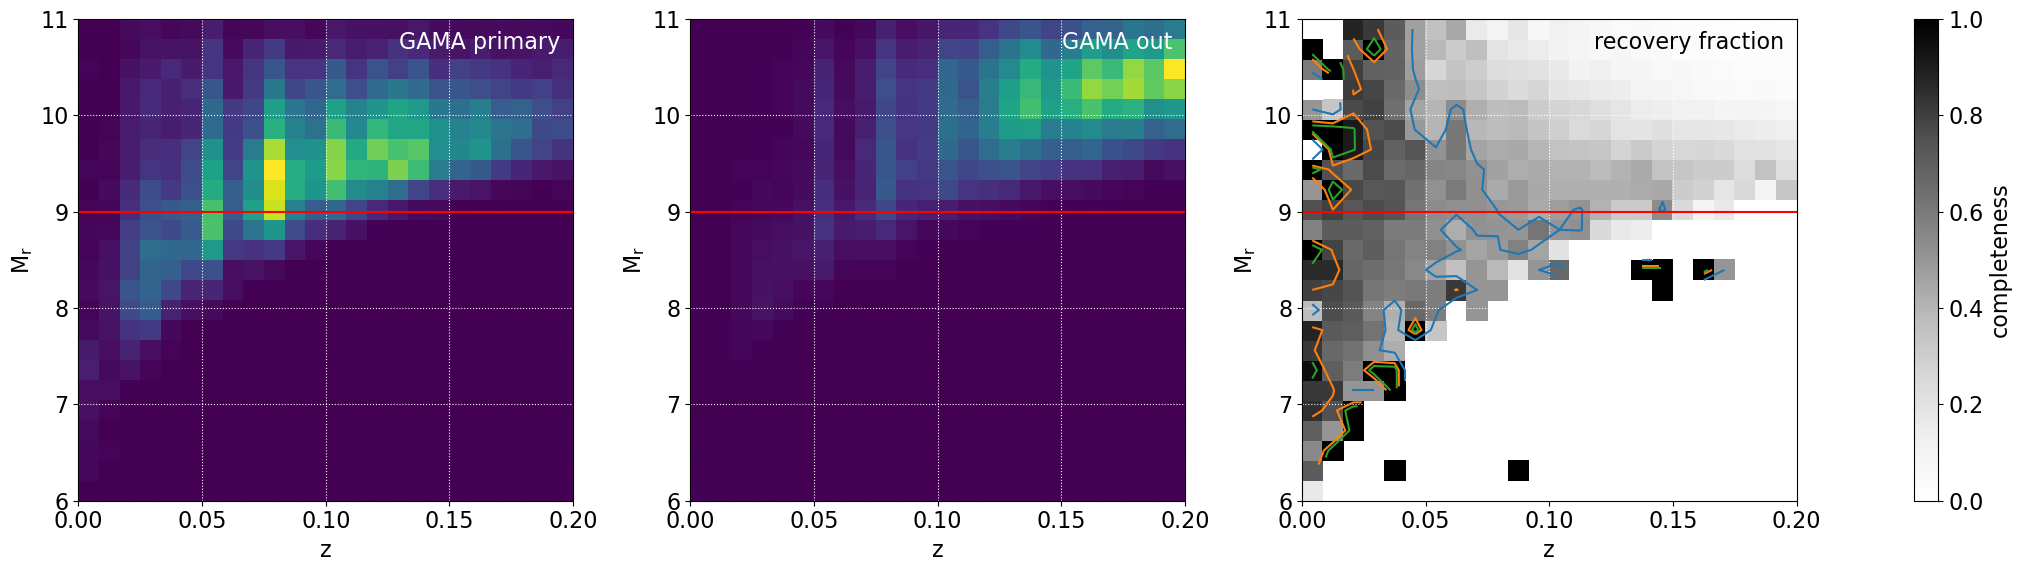

In [297]:
fig, axarr = plt.subplots(1,4,figsize=(5*4.1,6), gridspec_kw={'width_ratios':[1.,1.,1.,.05]})
nbins = 25
bins_l = [np.linspace(0., 0.2,nbins), np.linspace(6.,11.,nbins)]

inhist = axarr[0].hist2d ( gama_sl['Z'], gama_sl['logmstar'], bins=bins_l)
outhist = axarr[1].hist2d ( gama_out['Z'], gama_out['logmstar'], bins=bins_l)

# fact that more spectra were taken in exploration mode
recfrac = inhist[0]/(outhist[0]+inhist[0])
im = axarr[2].pcolor ( inhist[1], inhist[2], recfrac.T, cmap='Greys' )
axarr[2].contour ( midpts(inhist[1]), midpts(inhist[2]), recfrac.T, colors=['C0','C1','C2'], levels=[0.5,0.8,0.9])
plt.colorbar(im, cax=axarr[-1], label='completeness')

text = ['GAMA primary', 'GAMA out', 'recovery fraction']
cc_l = ['w','w','k']
for idx,ax in enumerate(axarr.flatten()[:-1]):
    ax.text ( 0.975, 0.975, text[idx], ha='right', va='top', color=cc_l[idx], transform=ax.transAxes )
    ax.set_xlabel('z')
    ax.set_ylabel(r'M$_{\rm r}$')
    ax.grid(color='w',ls=':')
    ax.axhline(9.,color='r')
    
plt.tight_layout ()